In [1]:
import mmcv
from mmcv.runner import load_checkpoint
from vitmvt.models import build_algorithm

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector

# customize config and checkpoint
device='cuda:0'
config = '/home/dk/vitmvt/configs/nas/vit_mvt_base/task_det.py'
checkpoint = '/home/dk/base_vit_mvt_det.pth'

cfg = mmcv.Config.fromfile(config)
model = build_algorithm(cfg.algorithm)
checkpoint = load_checkpoint(model, checkpoint, map_location=device)
# We need to set the model's cfg for inference
model.model.CLASSES = checkpoint['meta']['CLASSES']
model.cfg = cfg
# Convert the model to GPU
model.to(device)
# Convert the model into evaluation mode
model.eval()
print(model)



/home/dk/.conda/envs/HSCXT/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


load checkpoint from local path: /home/dk/base_vit_mvt_det.pth
ViT_MVT(
  (model): MaskRCNNSearch(
    (backbone): VIT_MVT_BACKBONE(
      (cnn_pre): Sequential(
        (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (5): ReLU(inplace=True)
        (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (8): ReLU(inplace=True)
      )
      (patch_embed): Patchembed(
        (proj): Conv2d(64, 576, kernel_size=(8, 8), stride=(8, 8))
      )
      (pos_embed): ParameterSlice_export()
      (layers): Sequential(
    

/home/dk/.conda/envs/HSCXT/lib/python3.7/site-packages/mmdet/datasets/utils.py:70: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


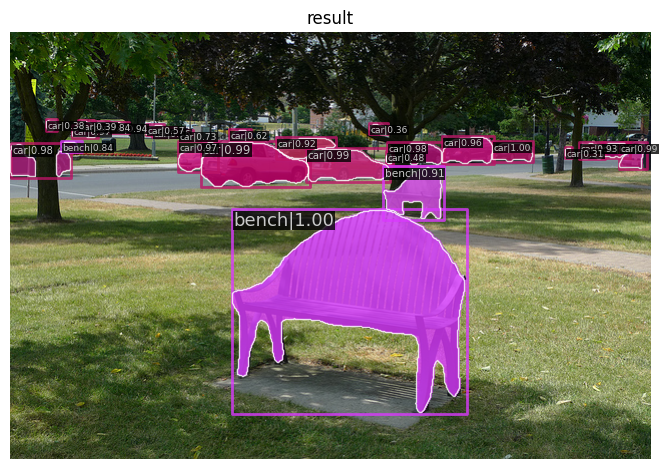

In [2]:
# customize your dataset path
img = '/home/dk/vitmvt/demo/det_demo.jpg'
result = inference_detector(model, img)
show_result_pyplot(model.model, img, result, score_thr=0.3)